<a href="https://colab.research.google.com/github/AdityaGhatty/Datascience/blob/main/Adit_GhatU6proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU6proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU6proj.ipynb"

# Unit 6 Project: Making a Generalized Linear Model (multiple predictors)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generilized linear model structure built with pymc and/or bambi. Your data must have more than three potential predictor variables. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is).
  - You must document and explain your model selection method. This means you must show that your likelihood/link function combo is better than at least one other choice of likelihood/link function.
  - You must document and explain your variable selection method. This means you must show that your final model is better than at least one other version of the model with a different selection of variables.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated hierearchical glm. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit6NotesAK *is* your example! Specifically, try to do something akin to using more of the columns in the basketball data to predict FG%. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [1]:
import pandas as pd
import pymc as pm
import arviz as az
!pip install bambi
import bambi as bmb
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 5.8 MB/s eta 0:00:00


CONTEXT

My project is using a dataset on Boston Housing values to see the influences of interactions between economic, environmental, and structural factors affecting median home values for given zones in the city. My variables are

crim - crime rate

zn - % of houses above a certain lot size

chas - by the charles river? yes/no

nox - nitrous oxide in the air (pollution)

rm - average number of rooms

age - % of houses  built before 1940

dis - distance from the closest of  5  major employment hubs in Boston

rad - radial highway access index

tax - tax rate

ptratio - student-teacher  ratio

lstat - % of the population considered low economic status

medv -  median housing value

In [2]:
houses=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
houses


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
#Model defining
model_total = bmb.Model("medv ~ crim+zn+indus+nox+rm+age+dis+rad+tax+ptratio+lstat",  data = houses)
#fitting
idata_total = model_total.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

<Axes: xlabel='medv'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


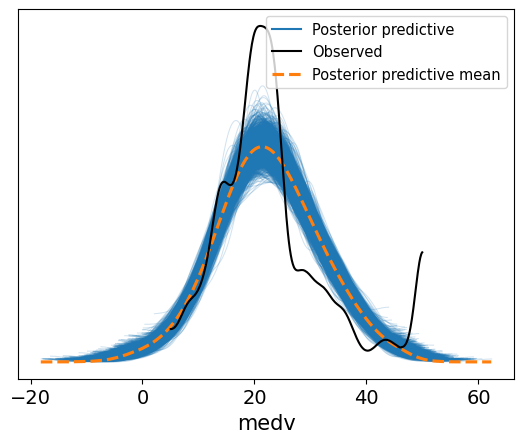

In [4]:
model_total.predict(idata_total, kind = "response")
az.plot_ppc(idata_total)

I just put all the variables in for this so I can compare with everything else

In [5]:
model_hypothesis = bmb.Model("medv ~ crim+zn+indus+nox+rm+age+dis+rad+ptratio",  data=houses)
idata_hypothesis = model_hypothesis.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

This is all the stuff I think could go into the model looking at my current DAG. I left out things I don't think are gonna work, like tax rates which are from laws, and can be decided by people arbitrarily. At this point I don't see a use for proximity to the Charles river so I didn't include that.

In [6]:
model_pollution=bmb.Model("`medv` ~ crim + zn + indus + nox + rm + age + dis + rad + ptratio + indus*nox + indus*dis + indus*rad + nox*dis + nox*rad + dis*rad", data=houses)
idata_pollution = model_pollution.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

This is a model with interactions between pollution based variables like industrial area and Nitrous Oxide, as well as distance from employment centers (city centers like downtown), and radial highway access.

In [7]:
model_qol=bmb.Model("`medv` ~ crim + zn + indus + nox + rm + age + dis + rad + ptratio + lstat + ptratio*lstat + lstat*crim + ptratio*crim", data=houses)
idata_quol = model_qol.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

This is a model with interactions between quality of life variables, like poverty rate, crime  rate, and student-teacher ratio. Lower student-Teacher ratio means more teachers, which is an indicator of more education funding and tied to quality of life and interacts with crime and poverty rates.

In [18]:
model_house=bmb.Model("medv ~ crim + zn + indus + nox + rm + age + dis + rad + ptratio + lstat + zn*rm + zn*age + rm*age", data=houses)
idata_house=model_house.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

These are just interactions between zones allotted for large residences, rooms, and house ages. I feel like these are pretty obvious predictors of high median values for a house, but I'm not sure if older houses are better, but thats  what I'm assuming for an urban area like Boston.

In [9]:
model_heir=bmb.Model("medv ~ (nox + crim + indus + rad | chas) + zn + rm + age + dis + ptratio + lstat", data = houses)
idata_heir=model_heir.fit(idata_kwargs={'log_likelihood':True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 527 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

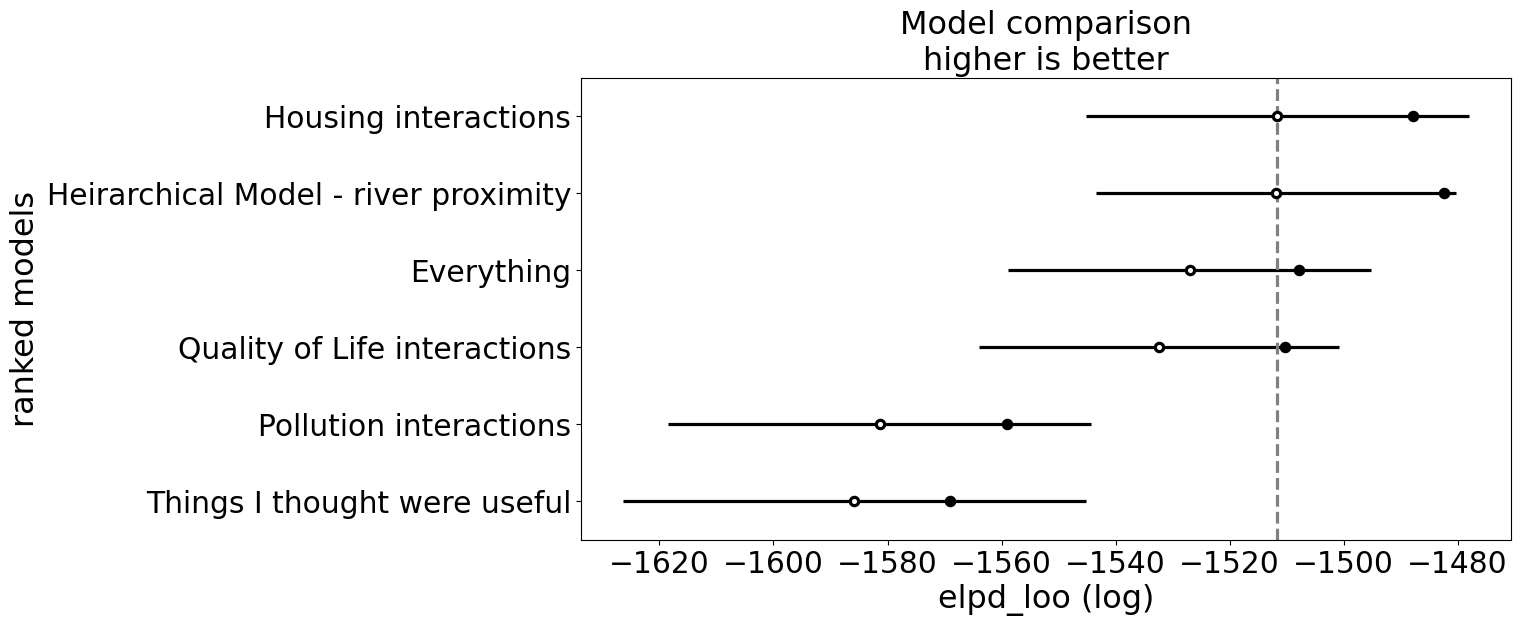

In [19]:
idata_dict = {
    "Everything": idata_total,
    "Things I thought were useful": idata_hypothesis,
    "Pollution interactions": idata_pollution,
    "Quality of Life interactions": idata_quol,
    "Housing interactions": idata_house,
    "Heirarchical Model - river proximity": idata_heir
}
comparison = az.compare(idata_dict)
az.plot_compare(comparison, figsize=(12, 6), insample_dev=True)

Kinda hurts but makes sense.  The things I thought were useful were just all variables added together, and pollution interactions didn't surprise me either considering some of the interactions were a stretch, like the radial highway access index. What I'm surprised about, however, is that the model with all variables and no interactions did significantly better than my variables and no interactions. Not going to lie, I'm kinda mad but it's alright.

<Axes: xlabel='medv'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


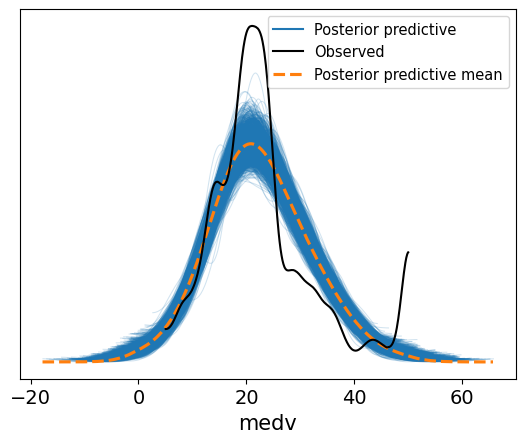

In [20]:
model_house.predict(idata_house, kind = "response")
az.plot_ppc(idata_house)

<Axes: xlabel='medv'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


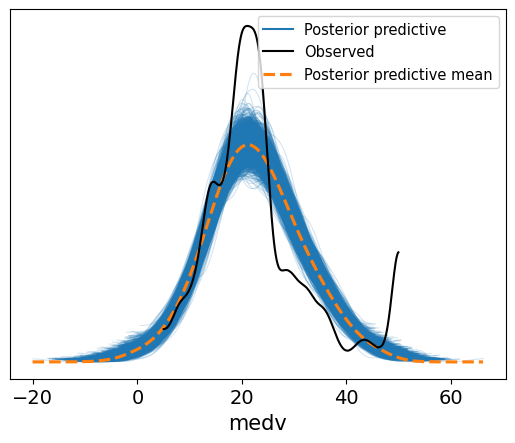

In [17]:
model_heir.predict(idata_heir, kind = "response")
az.plot_ppc(idata_heir)

So I'm looking at the river heirarchy, and it doesn't look too different from the other ppc plot, but the model performs significantly better elpd_loo wise. I'm thinking it's either because of houses by the river just being more expensive (strong interactions between river variable and the other ones) or something about heirarchical models. To test both of these, I'll create another river heirarchy with different variables I think have a more direct interaction with river proximity, and a model with heirarchies based on something else.

the OG heir formula: medv ~ (nox + crim + indus + rad | chas) + zn + rm + age + dis + ptratio + lstat

I thought about it a little bit, and in Austin  houses on the river are more expensive fs. I feel like if I was in Boston I'd want to live  by a river too. Not sure what else there would be outside to look at in Boston. Because of this, I'm going to do a heirarchical model with rm (number of rooms) zn (big houses)  and dis (distance to employment centers, which I think could be related. ChatGPT confirmed my suspicion "The Charles River serves as a central geographic feature in Boston, and its proximity generally correlates with shorter commuting distances to major employment hubs, such as:". )

In [12]:
model_river=bmb.Model("medv ~ (rm + zn + dis | chas) + crim + tax + ptratio + lstat", data=houses)
idata_river=model_river.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 452 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [13]:
model_highway = bmb.Model("medv ~ (nox + crim + indus + chas | rad) + zn + rm + age + dis + ptratio + lstat", data=houses)
idata_highway_hier = model_highway.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 102 divergences after tuning. Increase `target_accept` or reparameterize.


checking the PPCs and I'll just copy-paste the code for the ELPD Loo stuff again

<Axes: xlabel='medv'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


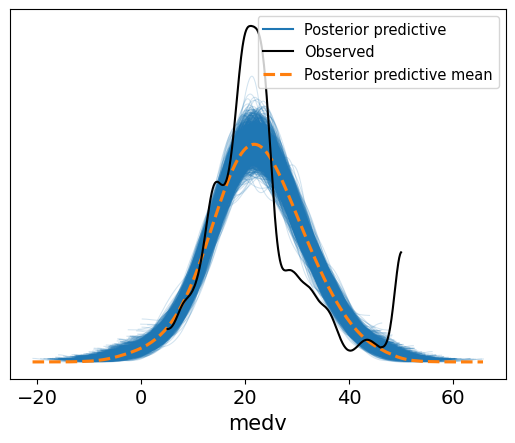

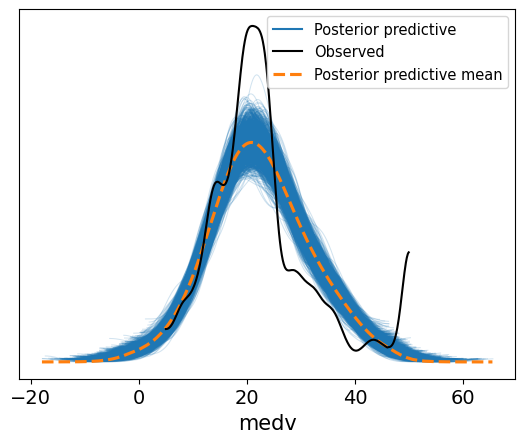

In [14]:
model_river.predict(idata_river, kind = "response")
az.plot_ppc(idata_river)

model_highway.predict(idata_highway_hier, kind = "response")
az.plot_ppc(idata_highway_hier)

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

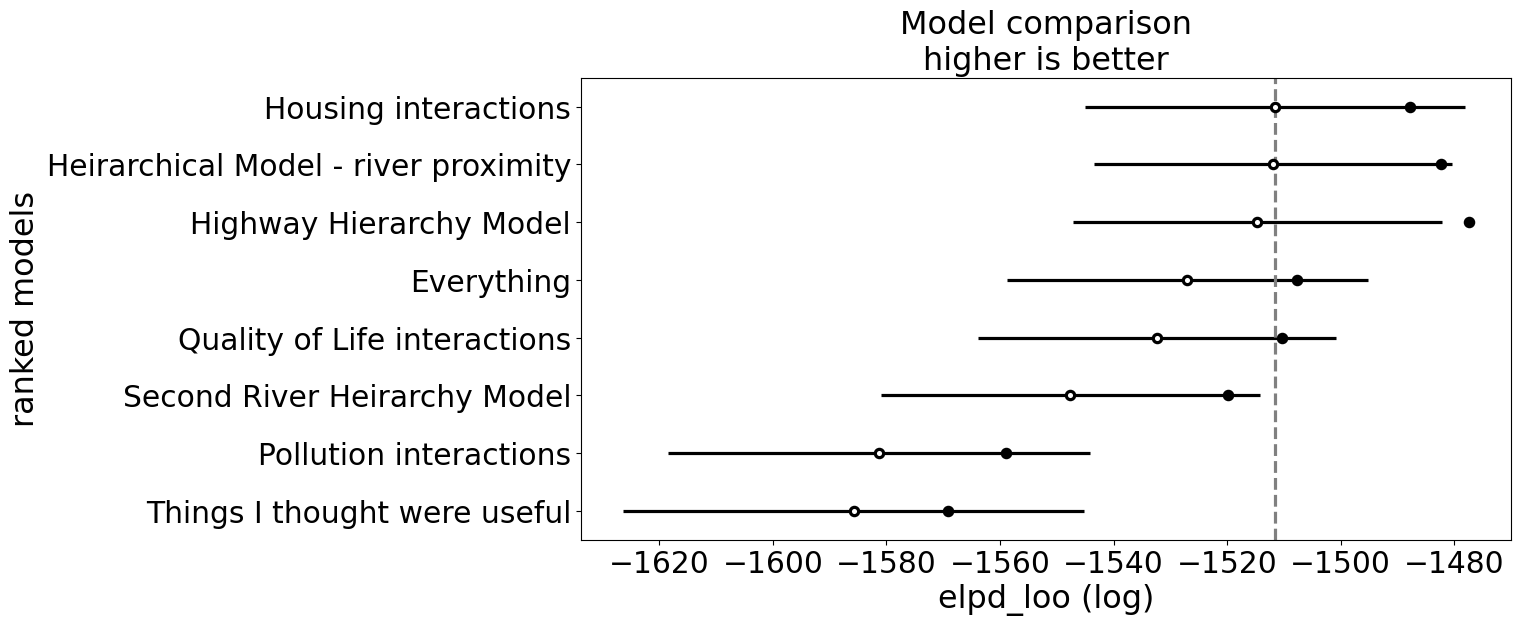

In [22]:
idata_dict = {
    "Everything": idata_total,
    "Things I thought were useful": idata_hypothesis,
    "Pollution interactions": idata_pollution,
    "Quality of Life interactions": idata_quol,
    "Housing interactions": idata_house,
    "Heirarchical Model - river proximity": idata_heir,
    "Second River Heirarchy Model": idata_river,
    "Highway Hierarchy Model": idata_highway_hier
}
comparison = az.compare(idata_dict)
az.plot_compare(comparison, figsize=(12, 6), insample_dev=True)

Drats

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='medv', ylabel='medv'>], dtype=object))

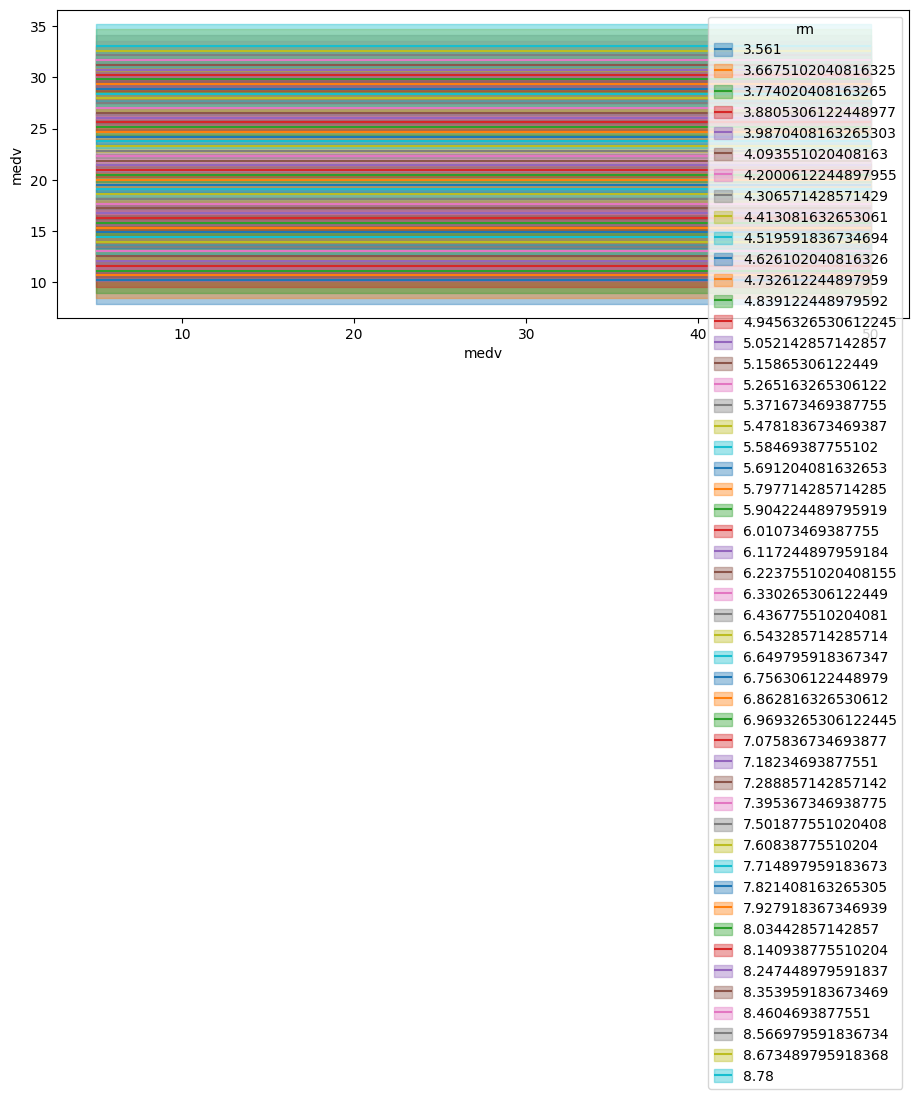

In [24]:
bmb.interpret.plot_predictions(model_house,
                               idata_house,
                               ["medv","rm"],
                               fig_kwargs={"figsize":(11,4)})


I messed up on the variables I put in the [] because I wasn't looking, but I'll keep the graph just because it shows that theres a pretty clear correlation between the number of rooms in a house and the median value.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='zn', ylabel='medv'>], dtype=object))

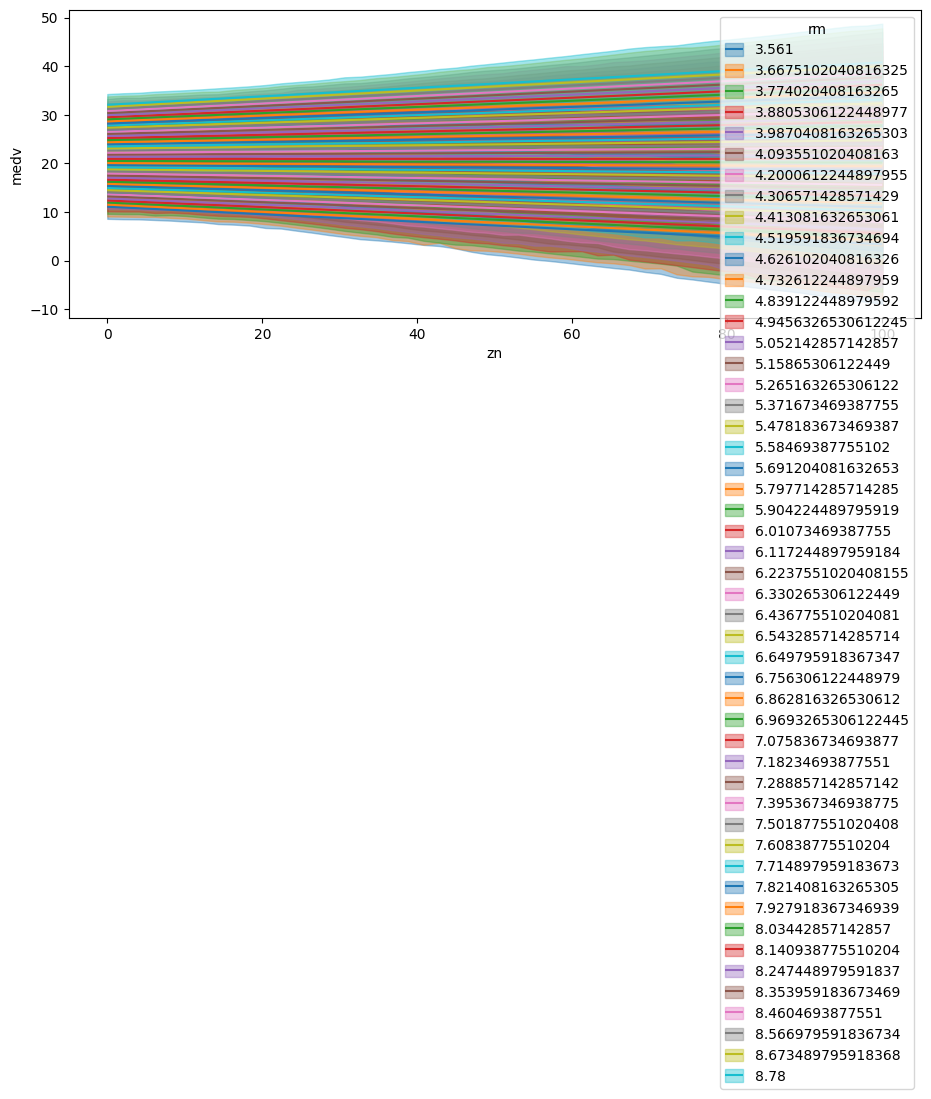

In [27]:
bmb.interpret.plot_predictions(model_house,
                               idata_house,
                               ["zn","rm"],
                               fig_kwargs={"figsize":(11,4)})


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='rm', ylabel='medv'>], dtype=object))

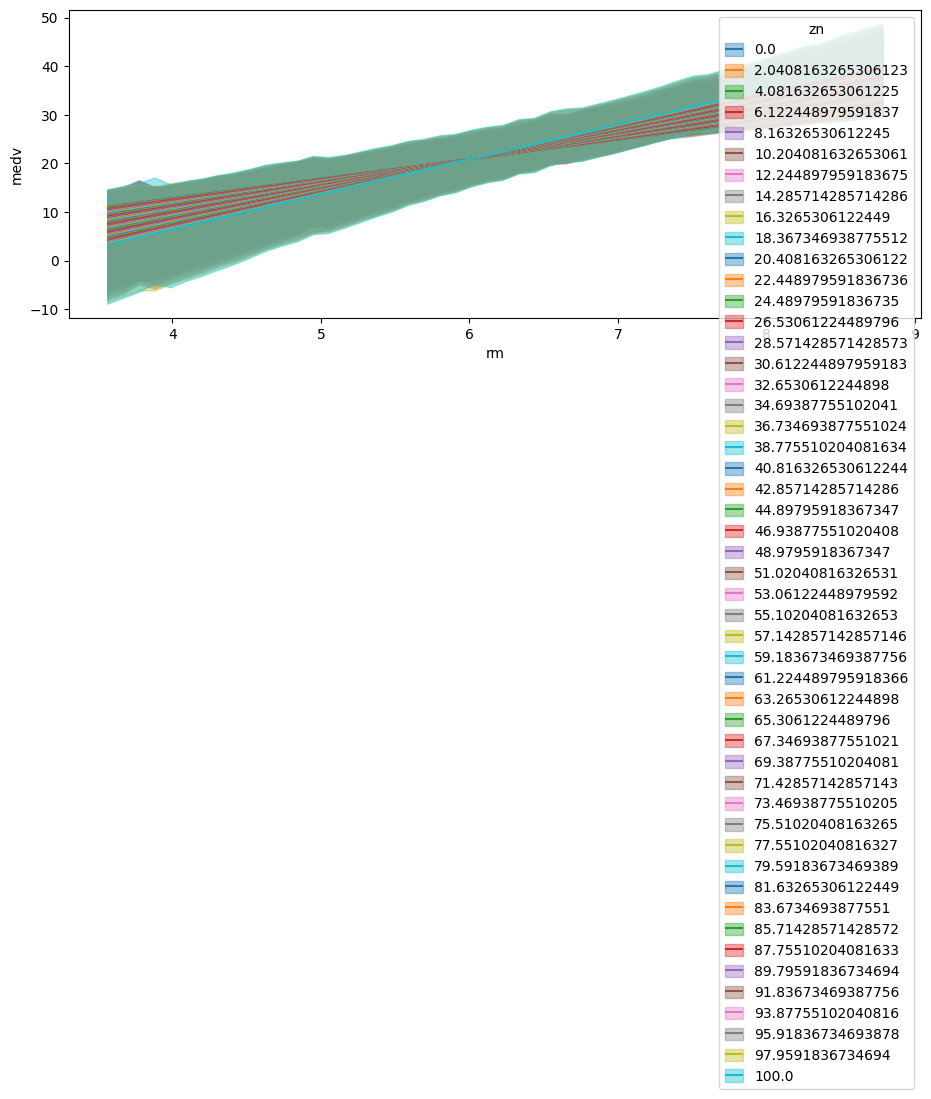

In [26]:
bmb.interpret.plot_predictions(model_house,
                               idata_house,
                               ["rm","zn"],
                               fig_kwargs={"figsize":(11,4)})


Did some visual thinking, and I'm seeing that as rooms increase in zones with a large zn (lot of big houses), median value increases. Makes sense. As  rooms go DOWN in an area with lots of big houses, median value goes down instead. I think because nobody wants to have the smallest house on the block?

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='nox', ylabel='medv'>], dtype=object))

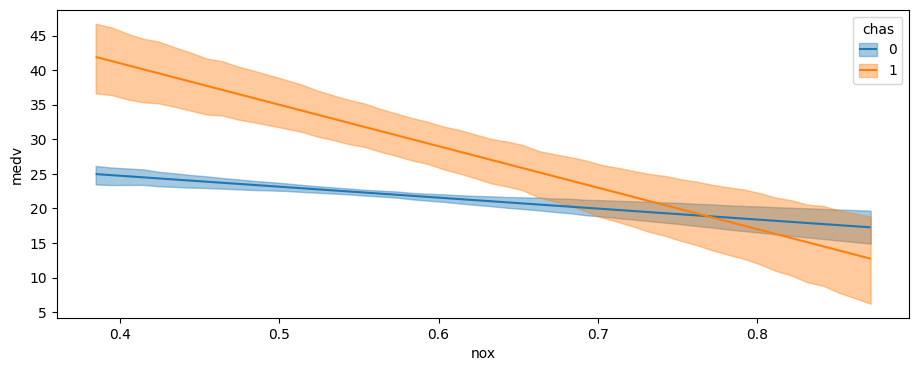

In [36]:
bmb.interpret.plot_predictions(model_heir,
                               idata_heir,
                               ["nox","chas"], #tried chas with all interaction variables, only nox produced an interesting, non-obvious effect
                               fig_kwargs={"figsize":(11,4)})

From this model, I can see that pollution affects median values, but more dramatically for houses by the Charles river. I'd imagine this is because houses by the river with high pollution might reduce the appeal of living by a river,  reducing desirability. Or maybe a prevelance of factories and industrial zones on some parts of the river.

CONCLUSION

Looking at the final graphs and elpd_loo values, I think the most significant models I've gotten are the housing and river model (first). The strongest predictor looks to be rooms, which makes sense for housing values, but a little more so when considering interactions with large residential zoning. However, the river variables seem to have a great effect on other important factors like pollution that have significant impacts on housing prices too.